In [1]:
from vapor import session, renderer, dataset, camera, utils, transferfunction
from vapor.animation import Animation
import numpy as np

Vapor 3.8.2
Python 3.9.16 (/Users/zongrunli/opt/anaconda3/envs/vapor)
OpenGL 4.1 INTEL-16.5.14


In [2]:
filenames = ["/Users/zongrunli/Desktop/WRF_Fire_Visualization/wrfout_d01_2022-04-25_00:00:00"]
ses = session.Session()
data = ses.OpenDataset(dataset.WRF, filenames)

### TimeStep?

In [3]:
ses.SetTimestep(60)

## Smoke 3D Render

## Read Variable

In [5]:
smoke_tracer_name = "tr17_2"
smoke_tracer_idx = data.GetDataVarNames(3).index(smoke_tracer_name)
# render
ren = data.NewRenderer(renderer.VolumeRenderer)
ren.SetVariableName(data.GetDataVarNames(3)[smoke_tracer_idx])
render_min = data.GetDataRange(smoke_tracer_name)[0]
render_max = data.GetDataRange(smoke_tracer_name)[1]
data.IsTimeVarying(smoke_tracer_name)

True

## Transfer Function

In [6]:
smoke_max = 100
smoke_min = 35
opacities = [(render_min, 0), (smoke_min, 0), (smoke_max, 1), (render_max, 1)]

In [7]:
ses.GetCamera().ViewAll()
tf = ren.GetPrimaryTransferFunction()
tf.SetOpacityControlPoints(opacities)
tf.SetMaxMapValue(100)
tf.SetMinMapValue(35)

## Colorbar

In [8]:
colorbar = ren.GetColorbarAnnotation()
colorbar.SetEnabled(True)
# Customized colorbar annotation
colorbar.SetSize((0.1, 0.25))
colorbar.SetTitle("PM2.5")
colorbar.SetCornerPosition((0.03, 0.03))

## Scene

In [9]:
scene = ses.GetSceneAnnotations()
scene.SetTimeType(scene.TimeAnnotationType.Formatted)
scene.SetTimeLLX(0.6)

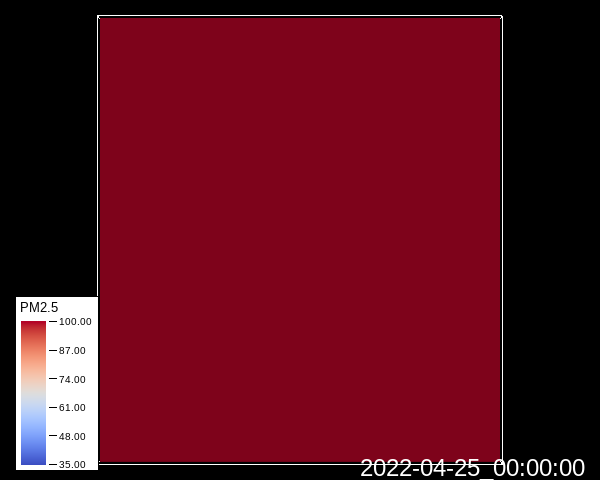

In [10]:
ses.Show()
# ses.Save("/Volumes/Shield/Coupling/10_min_timestep/tutorial.vs3")

In [12]:
from jupyter_vapor_widget import *
viz = VaporVisualizerWidget(ses)
def sliderChanged(change):
    ses.SetTimestep(change)
    viz.Render(fast=True)

slider = widgets.IntSlider(
    value=105, # initial value
    min=100,
    max=110,
    step=1
)
slider.observe(sliderChanged, names='value')
widgets.VBox([
    viz,
    widgets.HBox([widgets.Label("TimeStep:"), slider])
])

TypeError: void Session::SetTimestep(int ts) =>
    TypeError: could not convert argument 1 (int conversion expects an integer object)